# KNN

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Importing the dataset

In [2]:
df=pd.read_csv('Zoo.csv',index_col=0) #set index_col=0 to set first column as the index
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA or Feature Engineering steps

In [3]:
df.shape #shape of the dataset

(101, 17)

In [4]:
df.reset_index(drop='True',inplace=True) #Resetting the index from animals to numbers

In [5]:
df.isnull().sum() #Checking for null values

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [6]:
df.info() #Checking the datatype of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [7]:
for i in df.columns:
    print(i)
    print(df[i].describe()) #Summary of each feature in the dataset.

hair
count    101.000000
mean       0.425743
std        0.496921
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: hair, dtype: float64
feathers
count    101.000000
mean       0.198020
std        0.400495
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: feathers, dtype: float64
eggs
count    101.000000
mean       0.584158
std        0.495325
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: eggs, dtype: float64
milk
count    101.000000
mean       0.405941
std        0.493522
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: milk, dtype: float64
airborne
count    101.000000
mean       0.237624
std        0.427750
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: airborne, dtype: float64
aquatic
count    101.000

## Visualization of each feature:

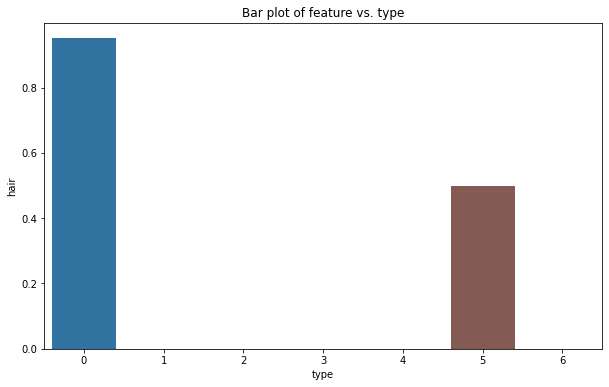

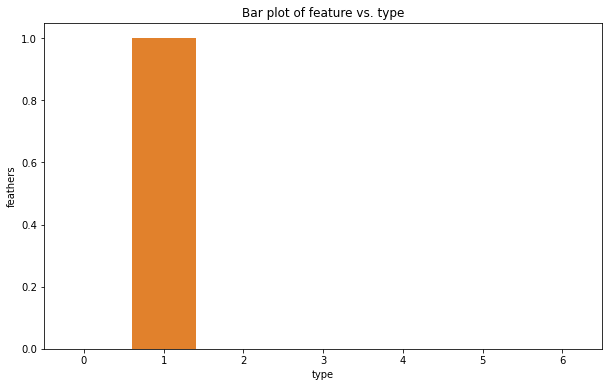

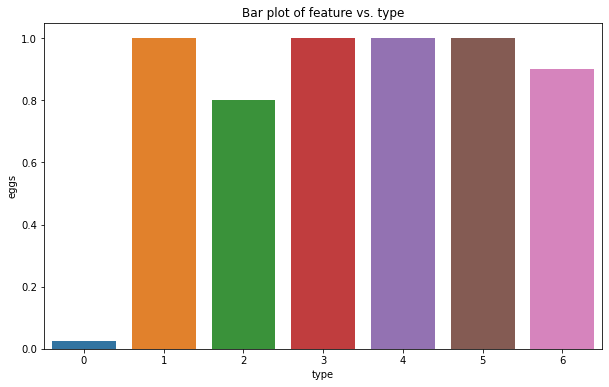

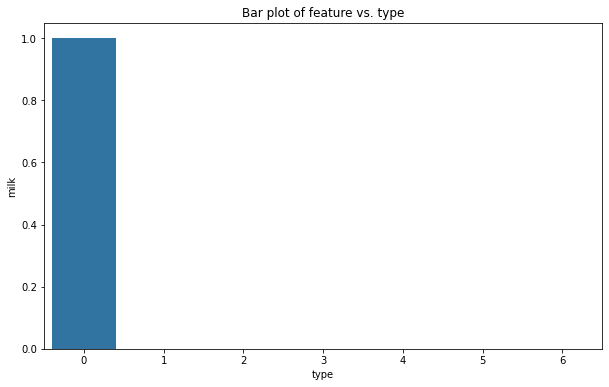

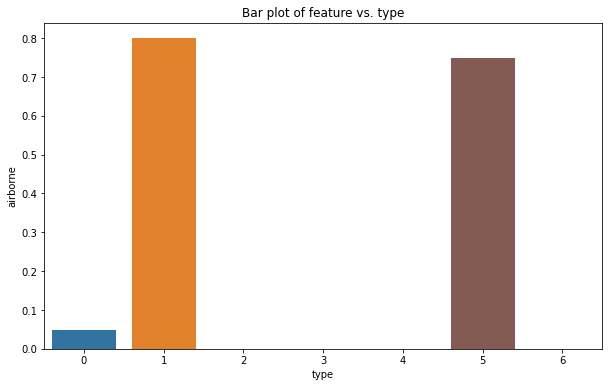

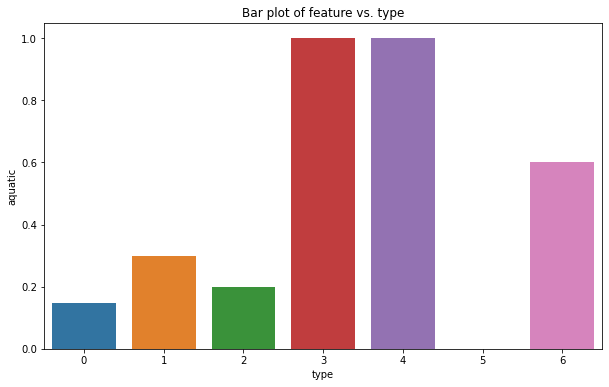

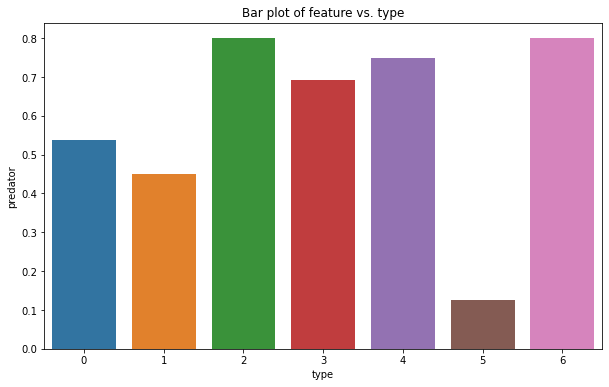

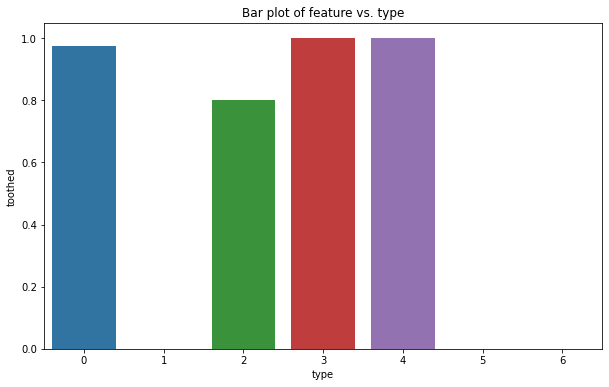

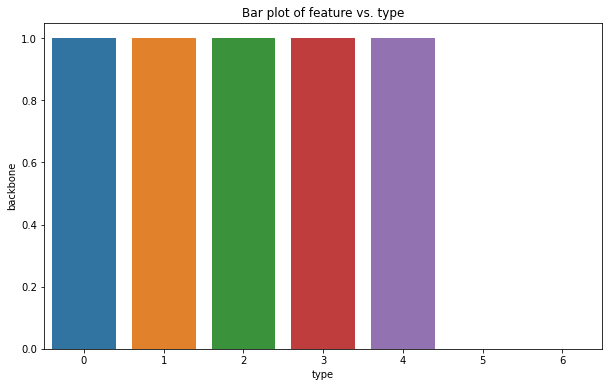

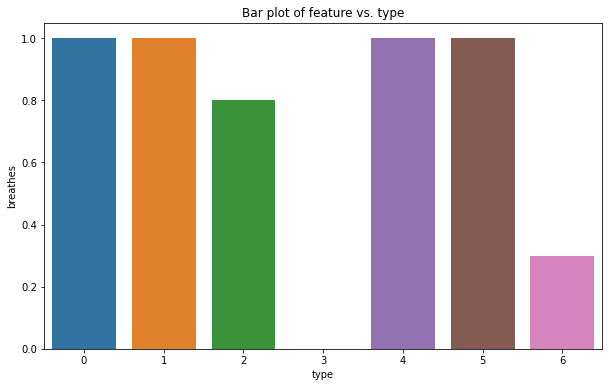

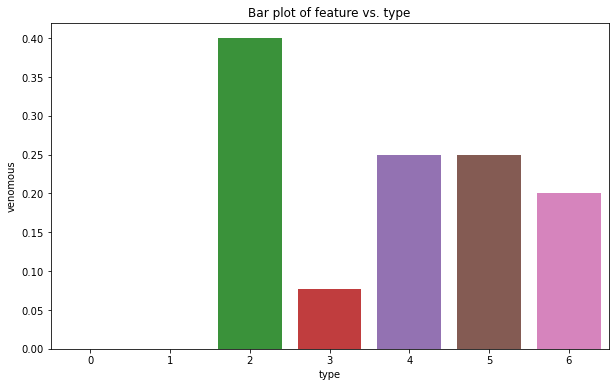

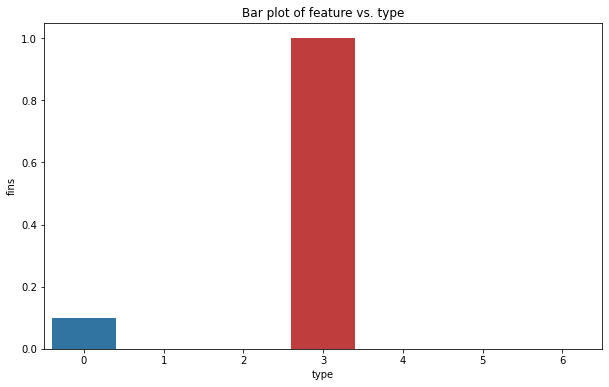

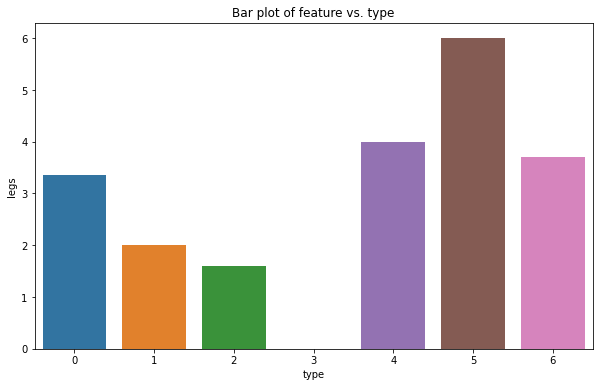

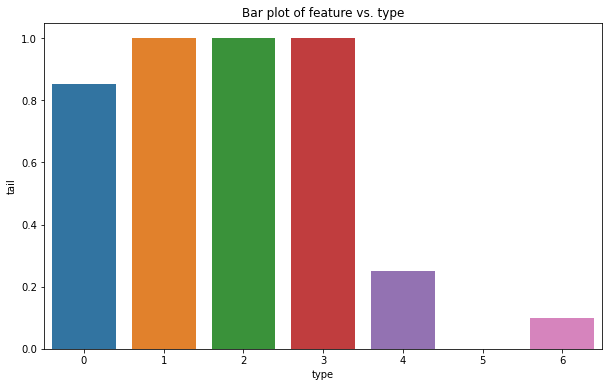

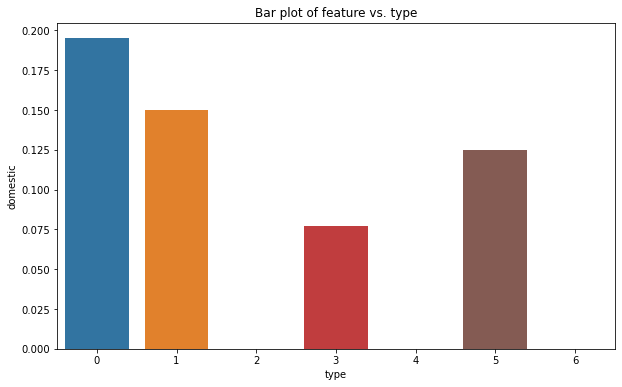

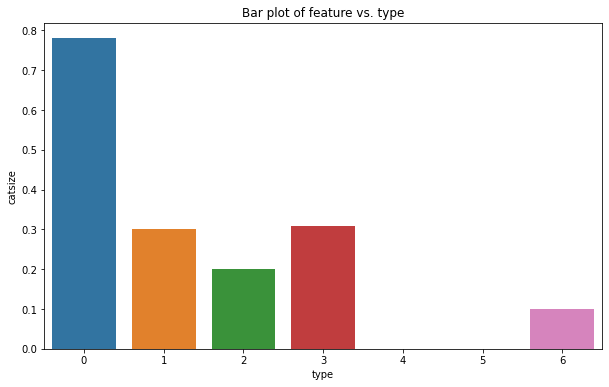

In [8]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10,6))
    sns.barplot(x=np.arange(0,7),y=df.groupby('type')[i].mean(),data=df) #df.groupby('type')[i].mean() will aggreagate each 
    #feature w.r.t the each class of the output feature and find the mean of them.
    plt.title('Bar plot of feature vs. type')
    plt.xlabel('type')

##### In the above block of code, I am plotting the  df.groupby('type')[i].mean() vs. output class and running a for loop.

## Handling imbalanced Dataset:
The ratio of each class in the output feature is imbalanced which affects the performance of the model. Hence we need to make them balanced before we build the model.

Class=1, n=41 (40.594%)
Class=4, n=13 (12.871%)
Class=2, n=20 (19.802%)
Class=7, n=10 (9.901%)
Class=6, n=8 (7.921%)
Class=5, n=4 (3.960%)
Class=3, n=5 (4.950%)


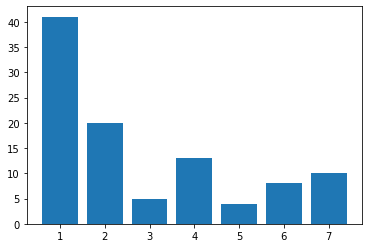

In [18]:
from collections import Counter 
X, y = df.iloc[:, :-1], df.iloc[:, -1] #separating the independent feature and the dependent feature into X and y variable.
counter = Counter(y) #Counter() function will give the count of each class in the output feature.
for k,v in counter.items(): #iterating through the loop
    per=v/len(y)*100        #Percentage of each class in 'y'.
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

##### As we can see that all the classes in the output feature is imbalanced. Class 1 has the highest no. and class 5 is the least.

In [19]:
from imblearn.over_sampling import SMOTE

Class=1, n=41 (14.286%)
Class=4, n=41 (14.286%)
Class=2, n=41 (14.286%)
Class=7, n=41 (14.286%)
Class=6, n=41 (14.286%)
Class=5, n=41 (14.286%)
Class=3, n=41 (14.286%)


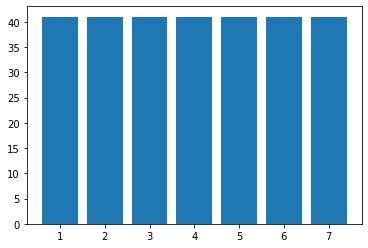

In [22]:
oversample = SMOTE(k_neighbors=3)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


##### Using SMOTE to make them a balanced dataset by oversampling the classes to the highest class. Here class 1 has the highest no. i.e 41. So we must oversample all the other classes to this no. Now the dataset is balanced.

In [25]:
print(X.shape)
print(y.shape)

(287, 16)
(287,)


##### The sample size has now increased from 101 to 287.

## Standardization:
 As the KNN model involves Eucledian distance, the higher magnitude parameters will be dominant over the lower magnitude ones, so we need to standardize the data.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
#df.reset_index()
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [72]:
#Fitting the standardscaler on the independent features
scaler=StandardScaler()
scaler.fit(X.iloc[:,:-1])  
scaler_features=scaler.transform(X.iloc[:,:-1])

In [77]:
X=pd.DataFrame(scaler_features,columns=df.columns[:-1])
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [78]:
print(y.head())

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64


## Train Test split:

In [31]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.30)

## Fitting the model:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn= KNeighborsClassifier(n_neighbors=1) #Creating an instance of the model with k=1

In [59]:
knn.fit(X_train,y_train) #Fitting the model to the train and test data

KNeighborsClassifier(n_neighbors=7)

In [60]:
pred=knn.predict(X_test) #predicting the test data

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [62]:
print(confusion_matrix(y_test,pred))

[[14  2  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  7]]


In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         7

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



##### We see that the model is giving us good accuracy and and good classification report. But since we  have considered k value to be 1 this might lead to underfitting of the model.  Lets choose a k value.

# Choosing a k-value:

In [50]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10) 
    error_rate.append(1-score.mean())

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\U

##### In the above block of code I am fitting KNN model for different ranges of neighbor from 1 to 40.  With cross validation =10 , it means 10 different train, test set is found out, we will find the mean of the score and append it to the error rate.

## Plotting the Error rate vs. k value

Text(0, 0.5, 'Error rate')

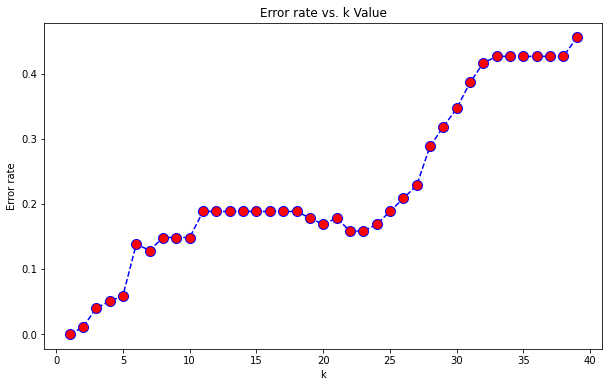

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error rate')

##### I see that in the above plot after k=8 the value of error rate remains constant and then increases again . Another approach in finding k is sqrt(n)/2 where n is the no. of samples in the dataset. sqrt

In [82]:
np.sqrt(287)/2

8.470537173048708

##### Hence k=8

## Fitting the model with k=8:

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn= KNeighborsClassifier(n_neighbors=8)

In [86]:
knn.fit(X_train,y_train) #Fitting the model to the train and test data

KNeighborsClassifier(n_neighbors=8)

In [87]:
pred=knn.predict(X_test) #predicting the test data

In [88]:
print(confusion_matrix(y_test,pred))

[[14  2  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  7]]


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         7

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87

